In [53]:
from matplotlib import pyplot as plt
import numpy as np

In [63]:
# sample functions
def first_f(x):
    return np.sin(x) + np.random.rand() * 10 ** -1

def second_f(x):
    return np.cos(x) + np.random.rand() * 10 ** -1

In [83]:
# first serie
xs0 = np.linspace(0, 2 * np.pi, 200)
ys0 = [first_f(x) for x in xs0]

In [84]:
# second serie
xs1 = np.linspace(0 + 1, np.pi + 1, 100)  # same frequency
ys1 = [second_f(x) for x in xs1]  # different function (scaled by PI / 2)

In [42]:
def lcs(X, Y, epsilon=0.1):
    m = len(X)  # lengths
    n = len(Y)
  
    # matrix to store DP: n + 1 columns, m + 1 rows
    L = [[0] * (n + 1) for i in range(m + 1)]
  
    lcs_length = 0  # store greatest value
    start_end_x = (0, 0)  # pair (start, end) where LCS starts ends
    start_end_y = (0, 0)
    
    for i in range(m + 1): 
        for j in range(n + 1): 
            if i == 0 or j == 0:  # first row, first column
                L[i][j] = 0
            elif abs(X[i - 1] - Y[j - 1]) < epsilon:  # values are similarr
                new_val = L[i - 1][j - 1] + 1  # dp
                L[i][j] = new_val

                if new_val > result:  # update max
                    lcs_length = new_val
                    start_end_x = (i - result, i)
                    start_end_y = (j - result, j)
            else: 
                L[i][j] = 0
    
    return lcs_length, start_end_x, start_end_y 

In [87]:
lcs_length, start_end_x, start_end_y = lcs(ys0, ys1, epsilon=0.1)
xs0_lcs, ys0_lcs = xs0[start_end_x[0]: start_end_x[-1]], ys0[start_end_x[0]: start_end_x[-1]]
xs1_lcs, ys1_lcs = xs1[start_end_y[0]: start_end_y[-1]], ys1[start_end_y[0]: start_end_y[-1]]

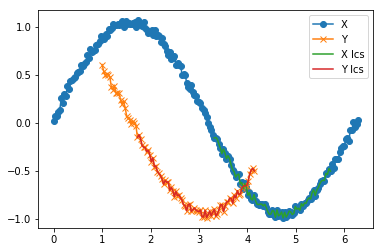

In [89]:
plt.plot(xs0, ys0, '-o', label='X')
plt.plot(xs1, ys1, '-x', label='Y')

plt.plot(xs0_lcs, ys0_lcs, label='X lcs')
plt.plot(xs1_lcs, ys1_lcs, label='Y lcs')

plt.legend()
plt.show()

In [90]:
    def _normalize(x):
        """
        :param x: list
        :return: min-max normalization
        """

        x = np.array(x)
        x_min, x_max = x.min(), x.max()
        return (x - x_min) / (x_max - x_min)

    def _get_diffs(x):
        """
        :param x: list
        :return: [x(n) - x(n-1), x(n-1) - x(n-2) ... x(1) - x(0)]
        """

        x = [
            x[i] - x[i - 1]
            for i in range(1, len(x), 1)  # 1 until the end
        ]
        return np.array(x)

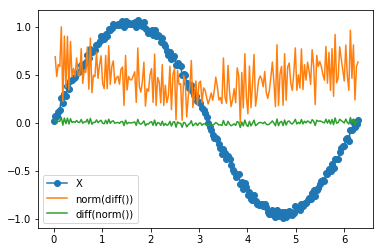

In [91]:
a = _normalize(_get_diffs(ys0))
b = _get_diffs(_normalize(ys0))

plt.plot(xs0, ys0, '-o', label='X')

plt.plot(xs0[1:], a, label='norm(diff())')
plt.plot(xs0[1:], b, label='diff(norm())')

plt.legend()
plt.show()